# Import the Libraries

In [ ]:
import numpy as np

# dataframe format options
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 50)

import random

import re

import requests
from bs4 import BeautifulSoup
import time

from google.colab import drive

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

import sklearn as sk

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

# To store a model
import joblib

# for google credentials
#from google.colab import auth
#auth.authenticate_user()
#from oauth2client.client import GoogleCredentials

# to import google sheets
#import googleapiclient.discovery
#import gspread

In [ ]:
# Mount your Google Drive
drive.mount('/content/drive')

# Create a directory in Google Drive where you want to save your file
#!mkdir -p '/content/drive/My Drive/My Folder'
gfolder = '/content/drive/My Drive/Colab Notebooks'
gmodels = gfolder + "/models"
#print(gmodels)

Mounted at /content/drive


# Get the Cricket datasource from Google Drive
## Add Moneyline Caculations
## https://www.vegasinsider.com/moneyline-calculator/#:~:text=CALCULATING%20POSITIVE%20AND%20NEGATIVE%20MONEYLINE%20ODDS&text=For%20negative%20odds%2C%20you%20divide,number%20by%20the%20wager%20amount.&text=To%20calculate%20positive%20odds%2C%20you,that%20number%20by%20your%20wager.


## Publish to Web
### https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
### File -> Share -> Publish to WEB -> Entire doc as CSV

### Player
https://docs.google.com/spreadsheets/d/e/2PACX-1vRb7VK21pRJG59BdnuFU6rv4E25t7nWlSDDebLIuA0Dr-zRisB2OczGKd1sAxb1rqdpgL0xHuZjxtiQ/pub?output=csv

In [ ]:
#team_url_csv = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQQ1h8ZpfXcXb8ISOzghHgfkKE5zvP2Crb9fCHzoQAvPbbaEorkKixQYZiBkq1Hi8JUpjE5fJhT4dTG/pub?gid=303052024&single=true&output=csv"

pl_url_csv = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRb7VK21pRJG59BdnuFU6rv4E25t7nWlSDDebLIuA0Dr-zRisB2OczGKd1sAxb1rqdpgL0xHuZjxtiQ/pub?output=csv'
df = pd.read_csv(pl_url_csv)
df_bk = df
#print(df)
df.sample(10)

,Name_Idx,Name,Team,Format,M,Inn,NO,Runs,HS,Avg,BF,BFPM,SR,100,200,50,4s,6s
11,13,Jasprit Bumrah,India,ODI,86,25,14,90,16,8.18,156,1.813953,57.69,0,0,0,10,1
26,28,keshav-maharaj,South Africa,ODI,39,20,5,216,40,14.40,246,6.307692,87.80,0,0,0,28,2 ODI
31,33,travis-head,Australia,ODI,61,58,4,2184,152,40.44,2153,35.295082,101.44,4,0,15,238,47 ODI
15,17,Prasidh Krishna,India,ODI,17,7,5,2,2,1.00,17,1.000000,11.76,0,0,0,0,0
82,84,shadab-khan,Pakistan,ODI,69,43,11,851,86,26.59,990,14.347826,85.96,0,0,4,50,19 ODI
121,123,tanzim-hasan-sakib,Bangladesh,ODI,3,2,2,19,14,0.00,14,4.666667,135.71,0,0,0,2,1
24,26,heinrich-klaasen,South Africa,ODI,49,46,7,1639,174,42.03,1404,28.653061,116.74,4,0,6,142,58 ODI
16,18,Temba Bavuma,South Africa,ODI,36,35,3,1489,144,46.53,1666,46.277778,89.38,5,0,4,143,23
87,89,mohammad-wasim-jr,Pakistan,ODI,19,8,1,64,17,9.14,68,3.578947,94.12,0,0,0,3,4 ODI
119,121,shoriful-islam,Bangladesh,ODI,30,18,8,77,16,7.70,97,3.233333,79.38,0,0,0,6,3 ODI


In [ ]:
#df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name_Idx  122 non-null    int64  
 1   Name      122 non-null    object 
 2   Team      122 non-null    object 
 3   Format    122 non-null    object 
 4   M         122 non-null    int64  
 5   Inn       122 non-null    int64  
 6   NO        122 non-null    int64  
 7   Runs      122 non-null    int64  
 8   HS        122 non-null    int64  
 9   Avg       122 non-null    float64
 10  BF        122 non-null    int64  
 11  BFPM      122 non-null    float64
 12  SR        122 non-null    float64
 13  100       122 non-null    int64  
 14  200       122 non-null    int64  
 15  50        122 non-null    int64  
 16  4s        122 non-null    int64  
 17  6s        122 non-null    object 
dtypes: float64(3), int64(11), object(4)
memory usage: 17.3+ KB


Text(0.5, 1.0, 'Strike Rate Per Player - Top 10')

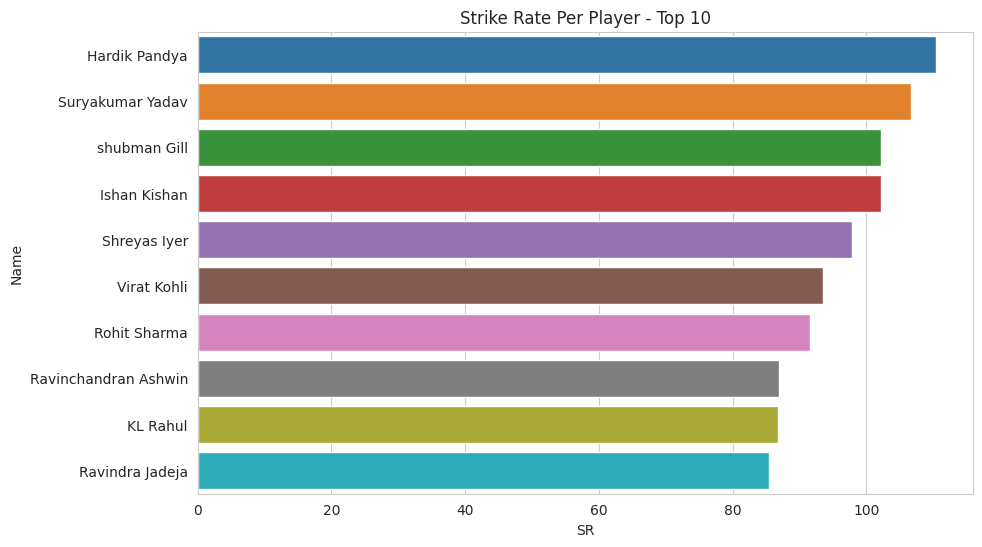

In [ ]:
plt.figure(figsize = (10,6))
#sns.countplot(y = 'SR', data = df,order= df['SR'].value_counts(20).index)
df_plot = df.head(10)
#print(df_plot.columns)
df_plot = df_plot.sort_values(by='SR', ascending=False)
df_plot
sns.barplot(x='SR', y='Name', data=df_plot)
plt.xlabel('SR')
#plt.ylabel('Team')
plt.title('Strike Rate Per Player - Top 10')

In [ ]:
# drop unwanted features
drop_feat = ['Name', 'Team', 'Format', 'BFPM', '100', '200', '50', '4s', '6s']
df = df.drop(drop_feat, axis=1)
# Drop rows where the 'SR' column is null
df = df.loc[~df['SR'].isnull()]

In [ ]:
# Team1 & Team2, manual encoding
# India, England, Australia, South Africa, New Zealand, Pakistan, Bangladesh, Sri Lanka as 1 through 8, in order
#df = pd.get_dummies(df, columns=["Team1", "Team2"], drop_first=True)
"""
ind = 1
eng = 2
aus = 3
saf = 4
nzd = 5
pak = 6
bgl = 7
slk = 8

df.loc[df['Team'] == "India", 'Team_Encoded'] = ind
df.loc[df['Team'] == "England", 'Team_Encoded'] = eng
df.loc[df['Team'] == "Australia", 'Team_Encoded'] = aus
df.loc[df['Team'] == "South Africa", 'Team_Encoded'] = saf
df.loc[df['Team'] == "New Zealand", 'Team_Encoded'] = nzd
df.loc[df['Team'] == "Pakistan", 'Team_Encoded'] = pak
df.loc[df['Team'] == "Bangladesh", 'Team_Encoded'] = bgl
df.loc[df['Team'] == "Sri Lanka", 'Team_Encoded'] = slk

df['Team_Encoded'] = df['Team_Encoded'].astype(int)
"""

'\nind = 1\neng = 2\naus = 3\nsaf = 4\nnzd = 5\npak = 6\nbgl = 7\nslk = 8\n\ndf.loc[df[\'Team\'] == "India", \'Team_Encoded\'] = ind\ndf.loc[df[\'Team\'] == "England", \'Team_Encoded\'] = eng\ndf.loc[df[\'Team\'] == "Australia", \'Team_Encoded\'] = aus\ndf.loc[df[\'Team\'] == "South Africa", \'Team_Encoded\'] = saf\ndf.loc[df[\'Team\'] == "New Zealand", \'Team_Encoded\'] = nzd\ndf.loc[df[\'Team\'] == "Pakistan", \'Team_Encoded\'] = pak\ndf.loc[df[\'Team\'] == "Bangladesh", \'Team_Encoded\'] = bgl\ndf.loc[df[\'Team\'] == "Sri Lanka", \'Team_Encoded\'] = slk\n\ndf[\'Team_Encoded\'] = df[\'Team_Encoded\'].astype(int)\n'

In [ ]:
df['M'] = df['M'].astype(int)
df['Inn'] = df['Inn'].astype(int)
df['NO'] = df['NO'].astype(int)
df['Runs'] = df['Runs'].astype(int)
df['HS'] = df['HS'].astype(int)
df['Avg'] = df['Avg'].astype(float)
df['BF'] = df['BF'].astype(int)
df['BF'] = df['BF'].astype(int)
df['SR'] = df['SR'].astype(float)

#df.columns
df.info()
#df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name_Idx  122 non-null    int64  
 1   M         122 non-null    int64  
 2   Inn       122 non-null    int64  
 3   NO        122 non-null    int64  
 4   Runs      122 non-null    int64  
 5   HS        122 non-null    int64  
 6   Avg       122 non-null    float64
 7   BF        122 non-null    int64  
 8   SR        122 non-null    float64
dtypes: float64(2), int64(7)
memory usage: 9.5 KB


In [ ]:
# Team for OU prediction
# ind = 1 eng = 2 aus = 3 saf = 4 nzd = 5 pak = 6 bgl = 7 slk = 8
#team1 = '1'

In [ ]:
#print(df)
df.describe()
#df.columns

,Name_Idx,M,Inn,NO,Runs,HS,Avg,BF,SR
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,62.500000,72.918033,57.196721,11.139344,1658.016393,89.459016,27.522131,1838.368852,87.085082
std,35.362409,60.765719,56.268048,11.213418,2292.120088,57.836496,14.867598,2555.228247,19.643685
min,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,0.000000,14.000000,11.760000
25%,32.250000,28.000000,20.000000,3.250000,208.750000,35.250000,14.302500,273.000000,79.540000
50%,62.500000,55.000000,37.500000,7.000000,722.500000,90.500000,28.125000,746.000000,88.610000
75%,92.750000,98.750000,69.000000,15.000000,2083.500000,133.750000,39.827500,2150.000000,96.867500
max,123.000000,289.000000,277.000000,51.000000,13626.000000,264.000000,61.030000,14565.000000,154.170000


## Add Moneyline metrics

## High risk bet scenario (Bet on losing teams)
### Bet $100, only on that has lower Odds of winning, for control
### Find out the Outcome

## Some statistics, just to understand the current siuation (High risk betting)

# A Build the Model
> ### Random Forest Classifier
> ### Logistic Regression
> ### Decision Tree Classifier
> ### Gradient Boosting Classifier
> ### XGBoost Classifier





## A1 Data visualization

In [ ]:
# save original data to recover, for debugging reasons
  # uncomment the following and comment back for recovery
#df = df_before_encoding
df_before_encoding = df

In [ ]:
plt.figure(figsize=(10, 6))
#sns.countplot(y='SR', data=df, order=df['Name_Idx'].value_counts().index)
#plt.xlabel('SR')
#plt.ylabel('Name_Idx')
#plt.title('Strike Rate')

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# Data Analysis
## CORR HeatMap

<Axes: >

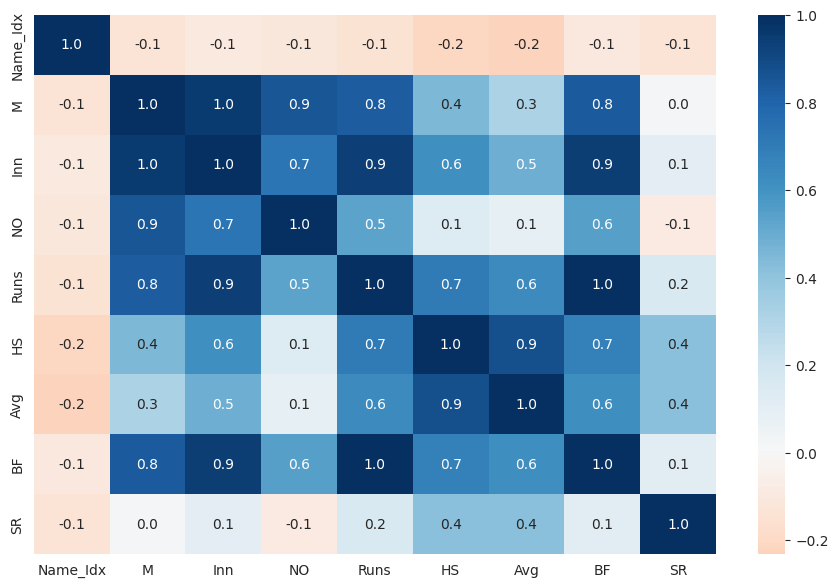

In [ ]:
# simple corr, w/o values
corr = df.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# colormap to a divergent
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

# include values and plot
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

## PCA to analze for dimentionality

In [ ]:
df.columns

Index(['Name_Idx', 'M', 'Inn', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR'], dtype='object')

In [ ]:
# Features and Target
#X = df[['M', 'Inn', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'BFPM', 'SR', 'Team_Encoded']]  # Independent variables
X = df[['Name_Idx', 'HS', 'BF', 'SR']]  # Independent variables
y = df['Avg']  # Dependent variable

# Example dataset
#data = {
#    'Game_Number': [1, 2, 3, 4, 5],
#    'Player_Condition': [90, 80, 85, 95, 88],  # Example feature
#    'Score': [15, 20, 18, 25, 22]  # Target variable
#}

# Features and Target
#X = df[['Game_Number', 'Player_Condition']]  # Assuming these are the relevant features
#y = df['Score']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21.20977179039995


In [ ]:
df_bk.columns

Index(['Name_Idx', 'Name', 'Team', 'Format', 'M', 'Inn', 'NO', 'Runs', 'HS',
       'Avg', 'BF', 'BFPM', 'SR', '100', '200', '50', '4s', '6s'],
      dtype='object')

# Prediction - Team Score (for Over/Under)
## Enter the TEAM NAME

In [ ]:
tm = 'India'

df_pred = pd.DataFrame()
df_pred = df_bk[df_bk['Team'] == tm]
df_pred


,Name_Idx,Name,Team,Format,M,Inn,NO,Runs,HS,Avg,BF,BFPM,SR,100,200,50,4s,6s
0,2,Rohit Sharma,India,ODI,259,251,36,10554,264,49.09,11530,44.517375,91.54,31,3,54,977,314
1,3,shubman Gill,India,ODI,41,41,6,2136,208,61.03,2090,50.975610,102.20,6,1,11,244,45
2,4,Virat Kohli,India,ODI,289,277,44,13626,183,58.48,14565,50.397924,93.55,49,0,70,1276,149
3,5,Shreyas Iyer,India,ODI,55,50,5,2094,113,46.53,2141,38.927273,97.80,3,0,17,198,48
4,6,Suryakumar Yadav,India,ODI,34,32,4,752,72,26.86,705,20.735294,106.67,0,0,4,79,19
5,7,Hardik Pandya,India,ODI,86,61,9,1769,92,34.02,1603,18.639535,110.36,0,0,11,132,67
6,8,Ravindra Jadeja,India,ODI,194,131,47,2747,87,32.70,3218,16.587629,85.36,0,0,13,199,54
7,9,Ravinchandran Ashwin,India,ODI,116,63,20,707,65,16.44,813,7.008621,86.96,0,0,1,60,7
8,10,KL Rahul,India,ODI,69,65,13,2536,112,48.77,2921,42.333333,86.82,6,0,16,198,55
9,11,Ishan Kishan,India,ODI,27,24,2,933,210,42.41,913,33.814815,102.19,1,1,7,95,33


In [ ]:
df_p1 = pd.DataFrame()
drop_p = ['Name', 'Team', 'Format', 'M', 'Inn', 'NO', 'Runs', 'Avg', 'BFPM', '100', '200', '50', '4s', '6s']

total_runs = 0
rnd_less = [1.3, 1.4, 1.5, 1.6, 1.7]
rnd_elem = random.choice(rnd_less)

# only 10 players
players = df_pred['Name_Idx'].to_list()[:10]
#print(players)

#for idx in [2]:
for idx in players:
            df_p = df_pred[df_pred['Name_Idx'] == idx]
            pl = df_p['Name'].to_list()[0]
            tm_name = df_p['Team'].to_list()[0]
            df_p = df_p.drop(drop_p, axis=1)
            predicted_avg_scores = model.predict(df_p)
            average_predicted_score = predicted_avg_scores.mean()
            print(f'Expected average runs for {pl} of {tm_name}: {int(average_predicted_score/rnd_elem)}')
            total_runs = total_runs + (average_predicted_score/rnd_elem )
            #print(f'Average Predicted Score for {tm_name}: {average_predicted_score}')
            #print(idx)

#df_p.columns
#print(df_p1)
#print(df_p2)
#df_pred
print(f'Predicted Total Runs for {tm_name}: {int(total_runs)}')

Expected average runs for Rohit Sharma of India: 43
Expected average runs for shubman Gill of India: 41
Expected average runs for Virat Kohli of India: 43
Expected average runs for Shreyas Iyer of India: 34
Expected average runs for Suryakumar Yadav of India: 19
Expected average runs for Hardik Pandya of India: 25
Expected average runs for Ravindra Jadeja of India: 25
Expected average runs for Ravinchandran Ashwin of India: 15
Expected average runs for KL Rahul of India: 34
Expected average runs for Ishan Kishan of India: 35
Predicted Total Runs for India: 318


In [ ]:
#X = df[['Name_Idx', 'HS', 'BF', 'SR']]  # Independent variables
#y = df['Avg']  # Dependent variable

# Predict the average score for the next game or series of games
#future_games = pd.DataFrame({
#    'Name_Idx': [2],
#    'HS': [75],
#    'BF': [44],
#    'SR': [50]
#    # Hypothetical future conditions
#})

#predicted_avg_scores = model.predict(future_games)
#average_predicted_score = predicted_avg_scores.mean()
#print(f'Average Predicted Score: {average_predicted_score}')

In [ ]:
#y_pred

## A2 Data Preparation
### Encoding may be necessary for all Object type features of the dataframe

## A3i.f Team winning Odds - Save models

In [ ]:
# Save the model to a file
#model_file = gmodels + "/" + "model_ou.joblib"
#joblib.dump(model_gbr, model_file)